In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pip install opendatasets --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od

Neste Projeto , é usado um Dataset rque pode ser encontrado no site Kaggle, sobre vendas de Videogame ao longo dos anos
ou seja vamos utilizar analise temporal e fazer uma abordagem estatistica Descritiva para tirar alguns Insights

In [4]:
dataset_url = 'https://www.kaggle.com/rishidamarla/video-game-sales' 

In [5]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\video-game-sales" (use force=True to force download)


In [6]:
data_dir = './video-game-sales'

In [7]:
import os
os.listdir(data_dir)

['Video_Games.csv']

In [8]:
game_sales_df = pd.read_csv('./video-game-sales/Video_Games.csv')

In [9]:
game_sales_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
game_sales_df.shape

(16719, 16)

In [11]:
game_sales_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

No código abaixo, podemos observar a quantidade total de valores nulos em cada coluna, quantidade muito alta de valores nulos na coluna pode ser um problema, 
cabe ao analista/cientista de dados observar e decidir seu descarte nas análises, pois podem comprometer os resultados das análises e gerar
insights errados.

In [12]:
game_sales_df.isnull().sum().sort_values(ascending=False)

User_Count         9129
Critic_Score       8582
Critic_Count       8582
Rating             6769
User_Score         6704
Developer          6623
Year_of_Release     269
Publisher            54
Name                  2
Genre                 2
Platform              0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
dtype: int64

In [13]:
game_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [14]:
print('The dataset contains {} rows and {} columns'.format(game_sales_df.shape[0],game_sales_df.shape[1]))


The dataset contains 16719 rows and 16 columns


Olhando apenas numeros fica dificil a interpretação da quantificação de valores nulos de cada coluna em relação ao total de linhas , então
é mais viável utilizar em termos de porcentagem(percentual) e também gráfico para melhor representação e visualização dos resultados, como é feito no codigo abaixo

In [15]:
perc_nan= game_sales_df.isnull().sum().sort_values(ascending=False)/len(game_sales_df)*100

In [16]:
perc_nan

User_Count         54.602548
Critic_Score       51.330821
Critic_Count       51.330821
Rating             40.486871
User_Score         40.098092
Developer          39.613613
Year_of_Release     1.608948
Publisher           0.322986
Name                0.011962
Genre               0.011962
Platform            0.000000
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
dtype: float64

<AxesSubplot:title={'center':'Percentage of NaN values'}, ylabel='Porcentagem'>

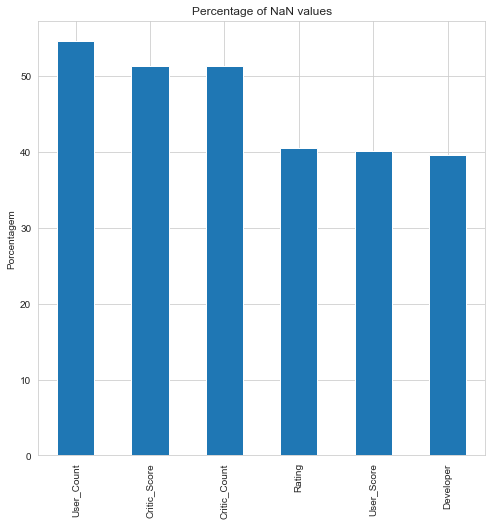

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))

plt.title('Percentage of NaN values')
plt.ylabel('Porcentagem')
perc_nan[perc_nan>=20].sort_values(ascending=False).plot.bar()


Neste projeto, coloquei como percentual crítico, 20 %, ou seja, não utilizar nas análises parâmetros(colunas) que possuam mais de 20% do seu total
como valores nulos, então faz-se uma lista com os nomes das colunas que não seram utilizadas para serem removidas do dataset original

In [18]:
colum_off =game_sales_df.isna().sum()[game_sales_df.isna().sum()>=(0.2*len(game_sales_df))]
colum_off

Critic_Score    8582
Critic_Count    8582
User_Score      6704
User_Count      9129
Developer       6623
Rating          6769
dtype: int64

In [19]:
list_colum_off=colum_off.index.to_list()

In [20]:
list_colum_off

['Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Developer',
 'Rating']

In [21]:
games_sales_df = game_sales_df.copy()

No código abaixo é feito a remoção das colunas listadas no passo anterior

In [22]:
game_sales_df.drop(list_colum_off,axis=1,inplace=True)

É importante também averiguar se a tabela apresenta algum valor negativo, seja por erro de digitação, importação errada, etc. 
Pois valores negativos em uma tabela onde só é esperado valores positivos, pode comprometer os resultados e análises
Utiliza-se o laço 'for' para passar em todas as linhas de todas as colunas, e armazenando os valores, se tiver, que são negativos. 

In [23]:
negativo = list()
for i in game_sales_df.select_dtypes(include=['float64','int64']).columns:
    y=any(x<0 for x in game_sales_df[i])
    if y==True:
        negativo.appendy(y)
        
print('There are {} negative values in the data frame.'.format(len(negativo)))

There are 0 negative values in the data frame.


In [24]:
game_sales_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000


# As Vendas Totais por Ano

C:\Users\victo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


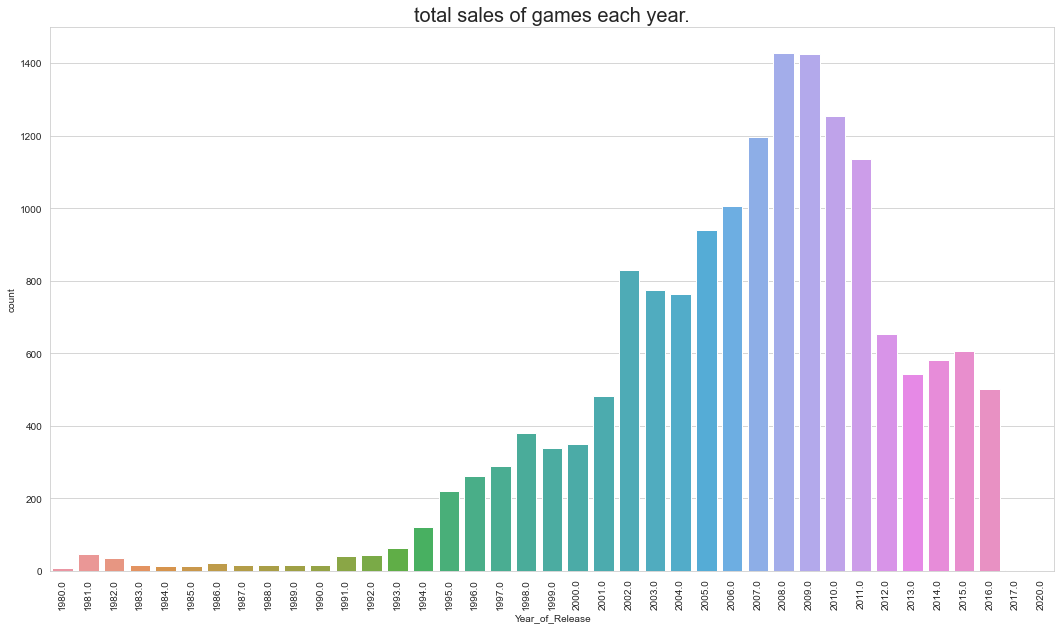

In [25]:
plt.figure(figsize=(18,10))
sns.countplot("Year_of_Release",data = game_sales_df)
plt.xticks(rotation=90) 
plt.title("total sales of games each year.",fontsize=20)
sns.set(font_scale =1)

Aparentemente pode se perceber que a partir de 2017 os dados ficam insuficientes, podemos aplicar um grafico de distribuição , para ver a concentração de informações

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year_of_Release', ylabel='Density'>

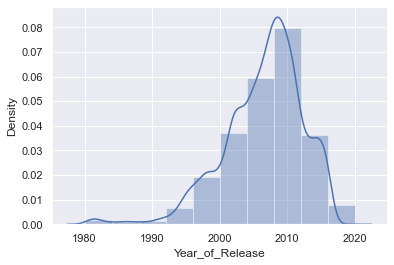

In [26]:
sns.distplot(game_sales_df[ "Year_of_Release"],bins=10 )  # seaborn

In [27]:
sales_df = game_sales_df.groupby('Year_of_Release',as_index=False).sum()
sales_df

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,10.59,0.67,0.00,0.12,11.38
1,1981.0,33.40,1.96,0.00,0.32,35.77
2,1982.0,26.92,1.65,0.00,0.31,28.86
3,1983.0,7.76,0.80,8.10,0.14,16.79
4,1984.0,33.28,2.10,14.27,0.70,50.36
5,1985.0,33.73,4.74,14.56,0.92,53.94
6,1986.0,12.50,2.84,19.81,1.93,37.07
7,1987.0,8.46,1.41,11.63,0.20,21.74
8,1988.0,23.87,6.59,15.76,0.99,47.22
9,1989.0,45.15,8.44,18.36,1.50,73.45


# As Vendas Totais por Ano por Localização

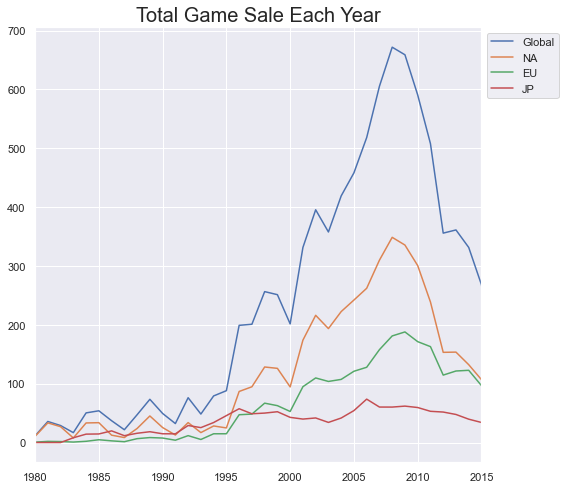

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))

plt.title("Total Game Sale Each Year", fontsize=20)
plt.plot(sales_df['Year_of_Release'],sales_df['Global_Sales'],label="Global" )
plt.plot(sales_df['Year_of_Release'],sales_df['NA_Sales'],label = "NA")
plt.plot(sales_df['Year_of_Release'],sales_df['EU_Sales'],label = "EU")
plt.plot(sales_df['Year_of_Release'],sales_df['JP_Sales'],label = "JP")
plt.xlim(1980,2015)
plt.legend(bbox_to_anchor =(1, 1))
plt.show()

Vamos olhar com mais atenção para o periodo de 2005 ate 2010, vamos identificar as top 10 plataformas, pois é o periodo
onde a tabela possui mais informações 

In [29]:
top_10 = game_sales_df.loc[(game_sales_df["Year_of_Release"]>2004) & (game_sales_df["Year_of_Release"]<2011)]

In [30]:
top_10_platform = top_10.groupby("Platform").sum()

In [31]:
top_10_platform.sort_values(by="Global_Sales",ascending=False,inplace=True)

In [32]:
top_10_platform=top_10_platform.reset_index()

In [33]:
top_10_platform

,Platform,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2187270.0,438.31,228.72,59.31,69.82,796.72
1,DS,3841221.0,353.12,175.24,163.31,55.09,747.29
2,X360,1474045.0,368.94,151.22,8.95,51.75,580.97
3,PS3,1201164.0,221.87,164.11,30.02,69.77,485.84
4,PS2,2123124.0,200.36,87.01,50.89,87.75,425.98
5,PSP,1738669.0,102.83,62.15,49.81,38.67,253.67
6,PC,851402.0,15.96,46.31,0.00,7.84,70.54
7,XB,491296.0,42.85,14.90,0.02,2.08,60.05
8,GBA,360951.0,26.85,10.19,4.78,0.72,42.68
9,GC,282753.0,27.97,7.47,2.78,0.93,39.36


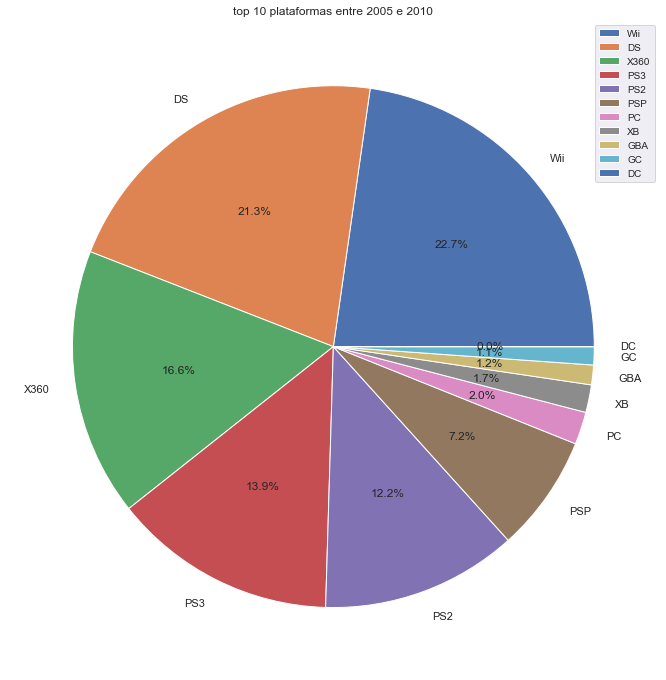

In [66]:
plt.figure(figsize=(24,12))
plt.title("top 10 plataformas entre 2005 e 2010")
plt.pie(top_10_platform["Global_Sales"], labels=top_10_platform["Platform"],autopct='%1.1f%%')
plt.legend(fontsize  = 10, bbox_to_anchor = (1, 1))

# gráfico para mostrar como o jogo (gênero) mais popular em 2005 estava indo até 2010 e como o gênero mais popular em 2010 estava antes (até 2010)

In [35]:
game_sales_df.loc[game_sales_df["Year_of_Release"]==2005].sort_values(by="Global_Sales",ascending=False)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.74,9.20,4.16,2.04,20.15
26,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.43,5.35,5.32,1.18,15.29
43,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.50,3.45,5.33,0.86,12.13
...,...,...,...,...,...,...,...,...,...,...
16171,World Poker Tour,GBA,2005.0,Misc,Take-Two Interactive,0.01,0.00,0.00,0.00,0.01
16166,SeaWorld Adventure Parks: Shamu's Deep Sea Adv...,XB,2005.0,Adventure,Activision,0.01,0.00,0.00,0.00,0.01
16150,Codename: Panzers Phase Two,PC,2005.0,Strategy,CDV Software Entertainment,0.00,0.01,0.00,0.00,0.01
16096,Space Invaders Revolution,DS,2005.0,Shooter,Rising Star Games,0.01,0.00,0.00,0.00,0.01


In [36]:
# comom pode se observar acima o jogo que mais vendeu em 2005 foi o Nintendogs, genero simulação

In [37]:
game_sales_df.loc[game_sales_df["Year_of_Release"]==2010].sort_values(by="Global_Sales",ascending=False)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.51,3.17,5.65,0.80,15.14
32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,14.61
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.99,4.37,0.48,1.79,12.63
54,Gran Turismo 5,PS3,2010.0,Racing,Sony Computer Entertainment,2.96,4.82,0.81,2.11,10.70
...,...,...,...,...,...,...,...,...,...,...
16226,Tears to Tiara: Kakan no Daichi Portable,PSP,2010.0,Adventure,Aqua Plus,0.00,0.00,0.01,0.00,0.01
16245,Pet Shop Monogatari DS 2,DS,2010.0,Simulation,Taito,0.00,0.00,0.01,0.00,0.01
16246,Monkey Madness: Island Escape,DS,2010.0,Action,Storm City Games,0.01,0.00,0.00,0.00,0.01
16249,Minna no Conveni,DS,2010.0,Simulation,Taito,0.00,0.00,0.01,0.00,0.01


In [38]:
# comom pode se observar acima o jogo que mais vendeu em 2010 foi o Nintendogs, genero Misc

In [39]:

game_list = game_sales_df.loc[(game_sales_df["Genre"]=="Simulation") & (game_sales_df["Year_of_Release"]>2004 ) & (game_sales_df["Year_of_Release"]<2011)]
game_list = game_list.groupby(['Genre', 'Year_of_Release'], as_index = False).sum()
game_list



,Genre,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Simulation,2005.0,19.16,16.28,9.02,4.51,48.92
1,Simulation,2006.0,10.60,6.12,2.38,2.42,21.56
2,Simulation,2007.0,26.83,13.82,3.02,4.68,48.42
3,Simulation,2008.0,26.62,11.90,3.66,3.93,46.09
4,Simulation,2009.0,17.35,11.51,0.95,3.11,33.03
5,Simulation,2010.0,11.02,6.67,1.66,2.14,21.55


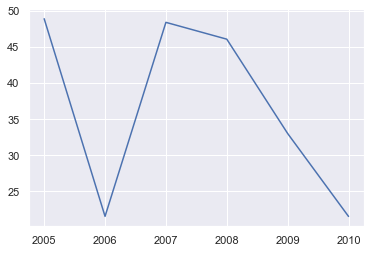

In [40]:
plt.plot(game_list["Year_of_Release"], game_list["Global_Sales"])

Pelo gráfico pode se observar uma oscilação porem com uma queda gradual entre 2008 e 2010, que pode se dever a popularização de novos gêneros, falta 
de investimento na continuação dos jogos do gênero Simulação.

In [41]:
game_list = game_sales_df.loc[(game_sales_df["Genre"]=="Misc") & (game_sales_df["Year_of_Release"]>2004 ) & (game_sales_df["Year_of_Release"]<2011)]
game_list = game_list.groupby(['Genre', 'Year_of_Release'], as_index = False).sum()
game_list

,Genre,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Misc,2005.0,26.76,20.21,7.96,6.04,61.08
1,Misc,2006.0,25.90,19.26,15.74,6.07,67.07
2,Misc,2007.0,47.55,20.62,11.46,11.83,91.52
3,Misc,2008.0,47.21,20.73,7.24,10.88,86.05
4,Misc,2009.0,40.60,20.18,5.80,9.23,75.80
5,Misc,2010.0,54.11,26.37,6.69,7.97,95.20


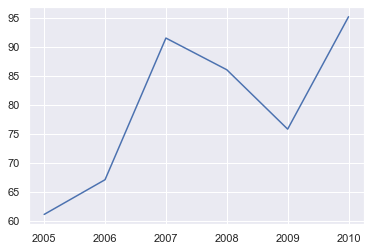

In [42]:
game_list = game_sales_df.loc[(game_sales_df["Genre"]=="Misc") & (game_sales_df["Year_of_Release"]>2004 ) & (game_sales_df["Year_of_Release"]<2011)]
game_list = game_list.groupby(['Genre', 'Year_of_Release'], as_index = False).sum()
game_list

plt.plot(game_list["Year_of_Release"], game_list["Global_Sales"])

A partir do gráfico podemos observar que houve um grande aumento na venda de jogos do gênero MISC, mas que devem ser melhor interpretados,
pois podem se dever a alguns Outliers, que distorcem essa visão genêrica de que realemnte houve um aumento na venda deste gênero.

Text(0.5, 1.0, 'Tendência da Editora de quantos jogos foram vendidos')

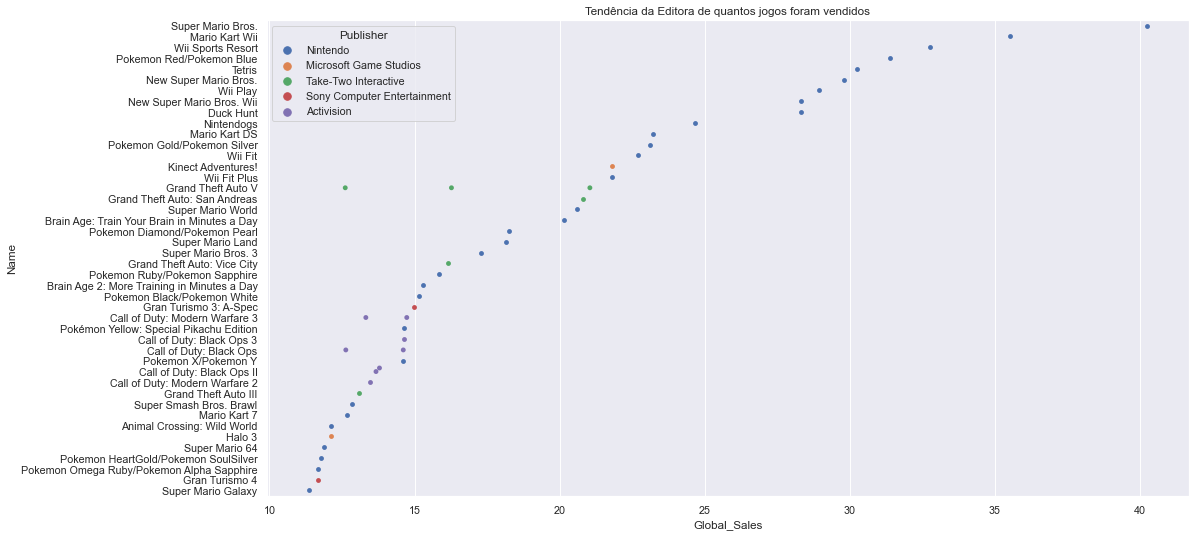

In [69]:
plt.figure(figsize=(17,9), dpi= 70)
sns.swarmplot(x='Global_Sales',
              y='Name',
              data=game_sales_df[1:50], #Ranged from 1 to 50 
              hue='Publisher')
plt.title('Tendência da Editora de quantos jogos foram vendidos')

No gráfico acima podemos observar que em um contexto Global, a Editora Nintendo  se distoa das outras, podendo possivelmente seus jogos serem 
os Outliers, mas podemos fazer a afirmação que seus jogos fazem mais sucesso e possuem melhor estratégia e conhecimento do seu mercado consumidor
analisando de maneira Global

# Analisando as Plataformas

In [71]:
list_country =game_sales_df.groupby("Platform").sum()
list_country

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rank
Platform,,,,,,,
2600,229928.0,90.60,5.47,0.00,0.91,97.08,584031
3DO,5984.0,0.00,0.00,0.10,0.00,0.10,43307
3DS,1030721.0,83.49,61.48,100.67,13.36,259.09,4770030
DC,103997.0,5.43,1.69,8.56,0.27,15.97,456492
DS,4261381.0,382.67,188.89,175.57,59.28,807.10,20899624
GB,193608.0,114.32,47.82,85.12,8.20,255.45,332095
GBA,1624604.0,187.54,75.25,47.33,7.73,318.50,7147611
GC,1085843.0,133.46,38.71,21.58,5.18,199.36,4822897
GEN,57798.0,21.05,6.05,2.70,0.97,30.78,205236


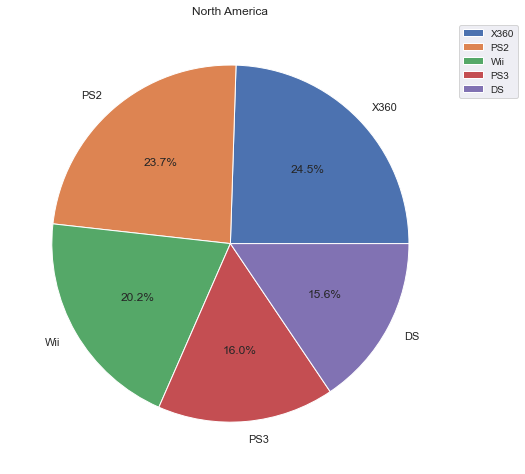

<ipython-input-72-c2483def0e30>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_country.sort_values(by=['EU_Sales'], ascending=False,inplace=True)


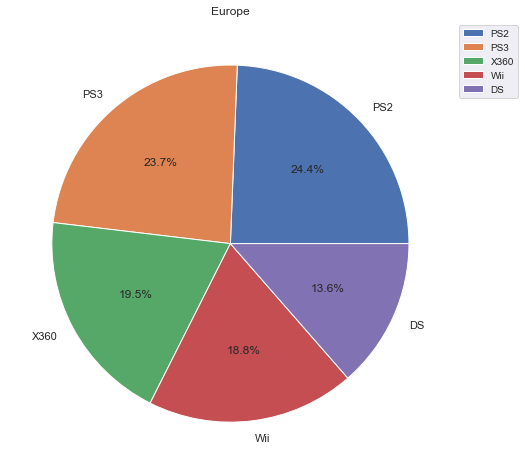

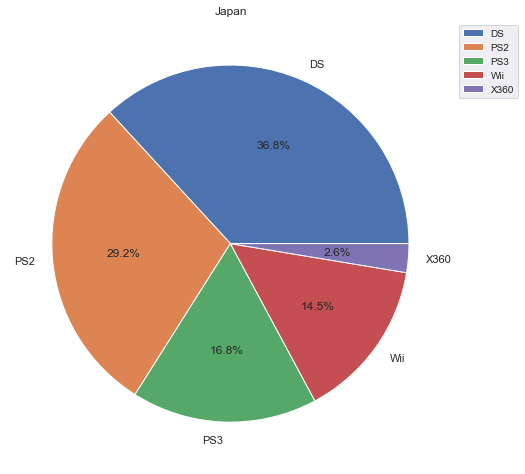

In [72]:
plt.figure(figsize=(8,12))
plt.title("North America")
list_country.sort_values(by=['NA_Sales'], ascending=False,inplace=True)
list_country = list_country.head(5)
plt.pie(list_country["NA_Sales"], labels=list_country.index,autopct='%1.1f%%')
plt.legend(fontsize  = 10, bbox_to_anchor = (1, 1))
plt.show()

plt.figure(figsize=(8,12))
plt.title("Europe")
list_country.sort_values(by=['EU_Sales'], ascending=False,inplace=True)
list_country = list_country.head(5)
plt.pie(list_country["EU_Sales"], labels=list_country.index,autopct='%1.1f%%')
plt.legend(fontsize  = 10, bbox_to_anchor = (1, 1))
plt.show()

plt.figure(figsize=(8,12))
plt.title("Japan")
list_country.sort_values(by=['JP_Sales'], ascending=False,inplace=True)
list_country = list_country.head(5)
plt.pie(list_country["JP_Sales"], labels=list_country.index,autopct='%1.1f%%')
plt.legend(fontsize  = 10, bbox_to_anchor = (1, 1))
plt.show()

In [73]:
list_country 


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rank
Platform,,,,,,,
DS,4261381.0,382.67,188.89,175.57,59.28,807.10,20899624
PS2,4263750.0,583.84,339.29,139.20,193.44,1255.64,16176676
PS3,2626158.0,393.49,330.29,80.19,135.68,939.43,9157292
Wii,2583531.0,496.90,262.21,69.33,79.07,908.13,10343425
X360,2476173.0,602.47,270.76,12.43,85.76,971.63,8477969


# Top 100 Video Games

In [47]:
game_sales_df["Rank"]=game_sales_df.index+1

In [76]:
games_top_100 =game_sales_df.head(20)

In [77]:
games_top_100

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rank
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,1
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,3
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,4
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,5
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,6
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,7
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,8
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,9
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,10


Text(0.5, 0, 'Rank')

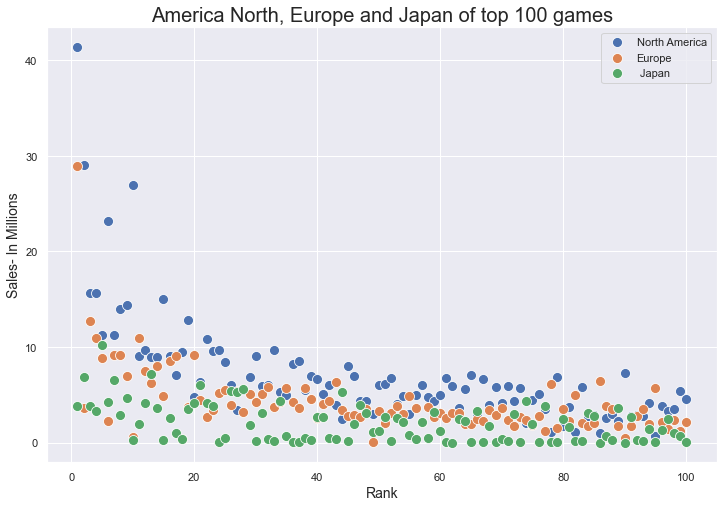

In [50]:

sns.set_style("darkgrid")
plt.figure(figsize=(12,8))

sns.scatterplot(x=game_sales_df["Rank"], y= games_top_100["NA_Sales"], s=100, label="North America");
sns.scatterplot(x=game_sales_df["Rank"], y= games_top_100["EU_Sales"], s=100, label = "Europe");
sns.scatterplot(x=game_sales_df["Rank"], y= games_top_100["JP_Sales"], s=100, label = " Japan");

plt.title("America North, Europe and Japan of top 100 games", fontsize=20)
plt.ylabel("Sales- In Millions", fontsize=14)
plt.xlabel("Rank",fontsize=14)



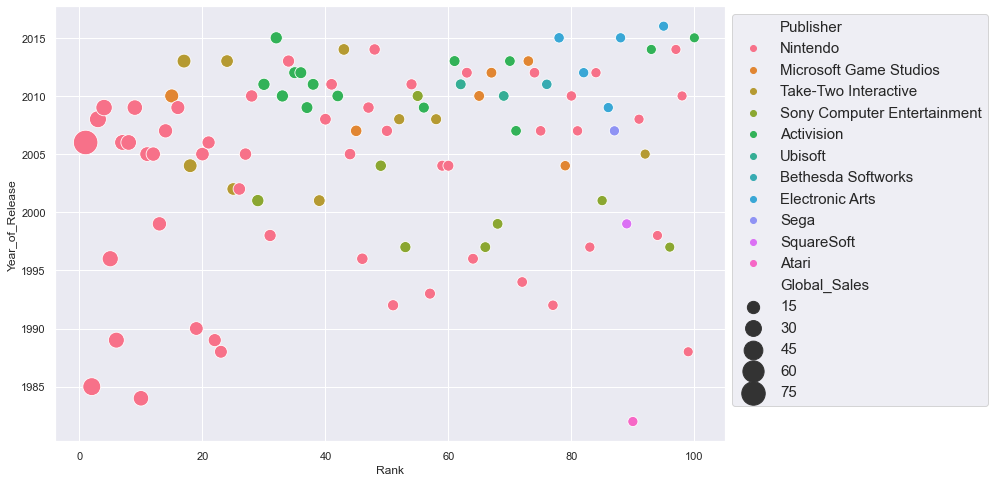

In [51]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))

sns.scatterplot(x=games_top_100["Rank"], y= games_top_100["Year_of_Release"], hue= games_top_100.Publisher,size= games_top_100.Global_Sales,
                sizes=(100,600));

plt.legend(bbox_to_anchor =(1, 1), fontsize='15')

plt.show()

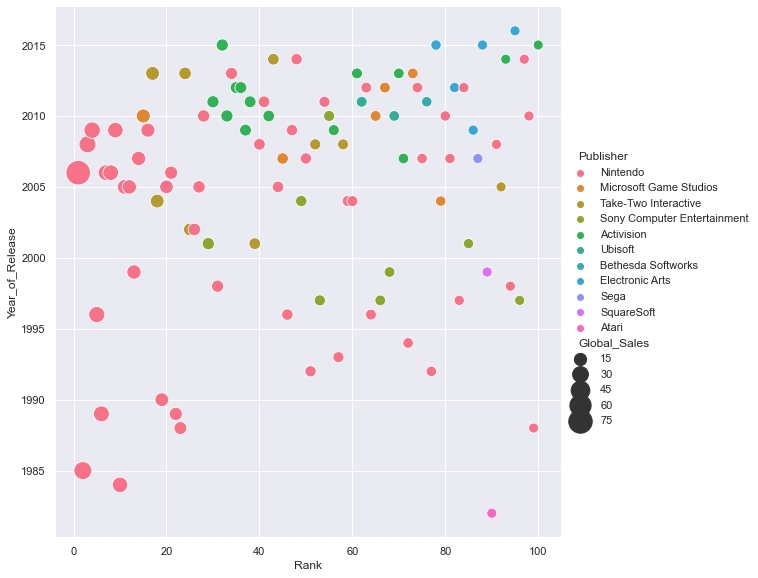

In [52]:
sns.set_style("darkgrid")
sns.relplot(x=games_top_100["Rank"], y= games_top_100["Year_of_Release"], hue= games_top_100.Publisher,size= games_top_100.Global_Sales,
                sizes=(100,600), height=8);


plt.show()

# Number of top 100 video game Publisher

In [53]:
games_top_100["Publisher"].value_counts().sort_values(ascending=False).head(100)

Nintendo                       52
Activision                     14
Take-Two Interactive            9
Sony Computer Entertainment     8
Microsoft Game Studios          6
Electronic Arts                 5
Ubisoft                         2
Bethesda Softworks              1
Sega                            1
SquareSoft                      1
Atari                           1
Name: Publisher, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Microsoft Game Studios'),
  Text(2, 0, 'Take-Two Interactive'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Activision'),
  Text(5, 0, 'Ubisoft'),
  Text(6, 0, 'Bethesda Softworks'),
  Text(7, 0, 'Electronic Arts'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'SquareSoft'),
  Text(10, 0, 'Atari')])

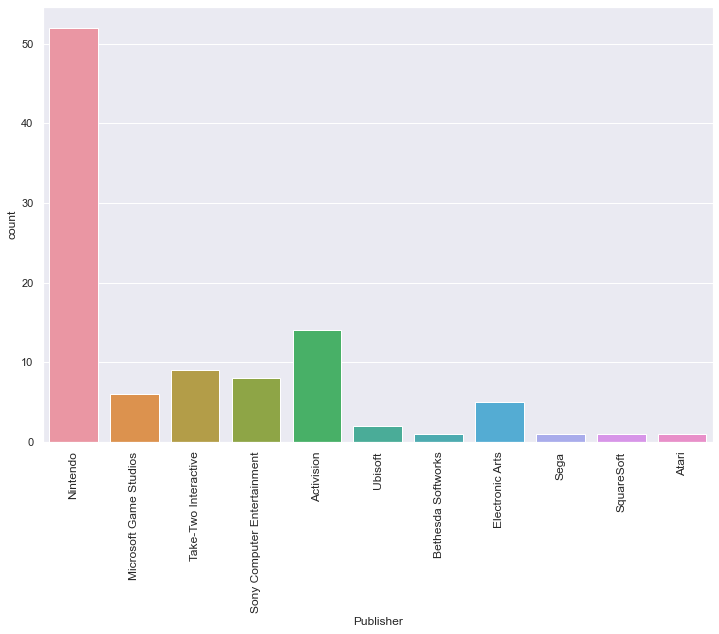

In [54]:

plt.figure(figsize=(12,8))
sns.countplot(x="Publisher", data=games_top_100)
plt.xticks(rotation=90, fontsize=12)




In [55]:
 Genre = games_top_100.groupby("Genre").sum()


In [56]:
Genre.drop("Year_of_Release",1,inplace=True)


In [57]:
Genre.drop("Rank",1,inplace=True)

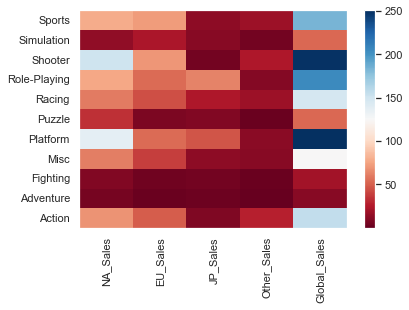

In [58]:
fig, ax = plt.subplots()
im = ax.pcolor(Genre, cmap='RdBu')

#label names
row_labels = Genre.columns
col_labels = Genre.index

#move ticks and labels to the center
ax.set_xticks(np.arange(Genre.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(Genre.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [59]:
Genre.sort_values(by="Global_Sales", ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Platform,137.56,54.53,46.65,12.31,251.04
Shooter,151.41,69.92,4.38,24.30,249.98
Role-Playing,76.88,54.46,63.78,10.15,205.33
Sports,79.25,72.14,13.98,18.62,183.94
Action,69.39,50.12,8.96,28.25,156.71
Racing,60.23,44.64,24.66,18.25,147.80
Misc,61.04,39.44,13.41,11.27,125.18
Simulation,14.57,23.18,11.65,4.59,53.97
Puzzle,33.91,8.06,9.54,1.84,53.36


In [60]:
Genre.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.843522,0.378927,0.689441,0.955349
EU_Sales,0.843522,1.000000,0.387594,0.833847,0.932528
JP_Sales,0.378927,0.387594,1.000000,0.041321,0.548413
Other_Sales,0.689441,0.833847,0.041321,1.000000,0.740458
Global_Sales,0.955349,0.932528,0.548413,0.740458,1.000000


<AxesSubplot:>

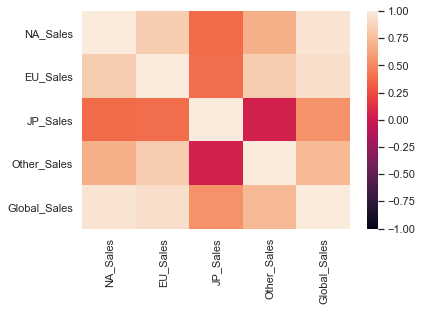

In [75]:
#sns.heatmap(Genre.corr())

sns.heatmap(Genre.corr(), 
        xticklabels=Genre.corr().columns,
        yticklabels=Genre.corr().columns,vmin=-1, vmax=1)